In [29]:
import sys
sys.path.append("../")
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import EmbJSD, EmbHeatGeo, EmbHeatPHATE, EmbCTD, EmbGraphMMD, EmbMarHeatGeo
import scanpy as sc
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap
import pandas as pd

In [4]:
# DATASET Nasal Epithelia FROM https://www.covid19cellatlas.org/index.patient.html

In [66]:
adata = sc.read_h5ad("../data/NasalSwab_Broad_BCH_UMMC_to_CZI.h5ad")
adata = adata[adata.obs['Annotation'].isin(['T Cells', "B Cells","Developing Ciliated Cells","Secretory Cells", "Developing Secretory and Goblet Cells"])]
sc.pp.subsample(adata, n_obs=5000)

In [67]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
adata = adata[:, adata.var.highly_variable]


In [68]:
adata.obs.T

,GTTGAGTTTTCC_684_pos_array1,AGGGAGGACAGG_563_pos_array1,TCGCAGGGTGCA_844_pos_array1,GGATATAGCCCC_465_pos_array1,AGATCATTAGTA_955_pos_array2,CGAAGCTACAAG_595_pos_Conv_array2,ATTATGACGGTT_209_pos_array1,GTAGATCAAAGA_563_pos_array1,ACGGCCGCTCTC_708_pos_array2,GACGCTGATCCG_563_pos_array1,...,TCTATCTAGTTA_000_neg_array1,CGGCACAATTTG_179_neg_array1,CTCTCTAATAGG_294_pos_array1,ATTTCGCGCTGA_376_neg_array1,ATCGTACGTGAC_363_pos_array1,AGGCATTATTTA_955_pos_array1,AAACTAAGGCAG_333_pos_array1,CGTAATATGAGG_955_pos_array2,GCGCAGTGCCTC_844_pos_array1,GAGCGCAAATGG_169_pos_array1
donor_id,COVID19_Participant22,COVID19_Participant17,COVID19_Participant29,COVID19_Participant14,COVID19_Participant20,COVID19_Participant34,COVID19_Participant11,COVID19_Participant17,COVID19_Participant4,COVID19_Participant17,...,Control_Participant7,Control_Participant5,COVID19_Participant19,Control_Participant10,COVID19_Participant35,COVID19_Participant20,COVID19_Participant8,COVID19_Participant20,COVID19_Participant29,COVID19_Participant25
Peak_Respiratory_Support_WHO_Score,5,8,4,8,7,0,5,8,8,8,...,0,0,8,0,1,7,4,7,4,4
Bloody_Swab,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Yes,No,No,No,No,No,No
Percent_Mitochondrial,3.974522,2.764538,37.867647,7.593123,28.721374,14.0,28.056112,13.79822,2.484472,13.006397,...,5.184332,32.552693,6.069554,19.839595,31.439394,9.470377,1.705321,2.586207,26.06906,5.528873
SARSCoV2_PCR_Status,pos,pos,pos,pos,pos,neg,pos,pos,pos,pos,...,neg,neg,pos,neg,pos,pos,pos,pos,pos,pos
SARSCoV2_PCR_Status_and_WHO_Score,pos_5,pos_8,pos_4,pos_8,pos_7,neg_0,pos_5,pos_8,pos_8,pos_8,...,neg_0,neg_0,pos_8,neg_0,pos_1,pos_7,pos_4,pos_7,pos_4,pos_4
Cohort_Disease_WHO_Score,COVID19_WHO_1-5,COVID19_WHO_6-8,COVID19_WHO_1-5,COVID19_WHO_6-8,COVID19_WHO_6-8,ConvalescentCOVID19_WHO_0,COVID19_WHO_1-5,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,...,Control_WHO_0,Control_WHO_0,COVID19_WHO_6-8,Control_WHO_0,COVID19_WHO_1-5,COVID19_WHO_6-8,COVID19_WHO_1-5,COVID19_WHO_6-8,COVID19_WHO_1-5,COVID19_WHO_1-5
biosample_id,WHO_5_COVID19_Participant22,WHO_8_COVID19_Participant17,WHO_4_COVID19_Participant29,WHO_8_COVID19_Participant14,WHO_7_COVID19_Participant20,WHO_0_COVID19_Participant34,WHO_5_COVID19_Participant11,WHO_8_COVID19_Participant17,WHO_8_COVID19_Participant4,WHO_8_COVID19_Participant17,...,WHO_0_Control_Participant7,WHO_0_Control_Participant5,WHO_8_COVID19_Participant19,WHO_0_Control_Participant10,WHO_1_COVID19_Participant35,WHO_7_COVID19_Participant20,WHO_4_COVID19_Participant8,WHO_7_COVID19_Participant20,WHO_4_COVID19_Participant29,WHO_4_COVID19_Participant25
SingleCell_SARSCoV2_RNA_Status,neg,neg,amb,neg,neg,neg,neg,neg,neg,neg,...,neg,neg,neg,neg,neg,neg,neg,neg,amb,amb
SARSCoV2_Unspliced_TRS_Total_Corrected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
labels = adata.obs.Annotation
data = adata.X

knn=20
anisotropy=0
decay=40
tau_min=0.05
tau_max=10
n_landmark=5000

In [77]:
sc.pp.neighbors(adata, n_neighbors=knn, use_rep='X')
sc.tl.umap(adata, min_dist=0.8, spread=1, n_components=2, random_state=0)

In [78]:
emb_umap = adata.obsm['X_umap']

In [79]:
emb_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, n_landmark=n_landmark)
emb_multi = emb_op.fit_transform(data.toarray(),tau_min=tau_min, tau_max=tau_max, n_tau=10)
emb_op = phate.PHATE(knn=knn, anisotropy=anisotropy, decay=decay)
emb_phate = emb_op.fit_transform(data.toarray())
#emb_pca = adata.obsm["X_pca"][:,0],adata.obsm["X_pca"][:,1]
emb_op = TSNE(early_exaggeration=20)
emb_tsne = emb_op.fit_transform(data.toarray())

Calculating PHATE...
  Running PHATE on 4772 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.20 seconds.
  Calculated graph and diffusion operator in 3.63 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.66 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.50 seconds.
  Calculated landmark operator in 5.03 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 3.64 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.56 seconds.
Calculated PHATE in 17.92 seconds.


/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [104]:
emb_op = EmbMarHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb_mar = emb_op.fit_transform(data.toarray(),tau_min=tau_min, tau_max=tau_max, n_tau=5, sca)

/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

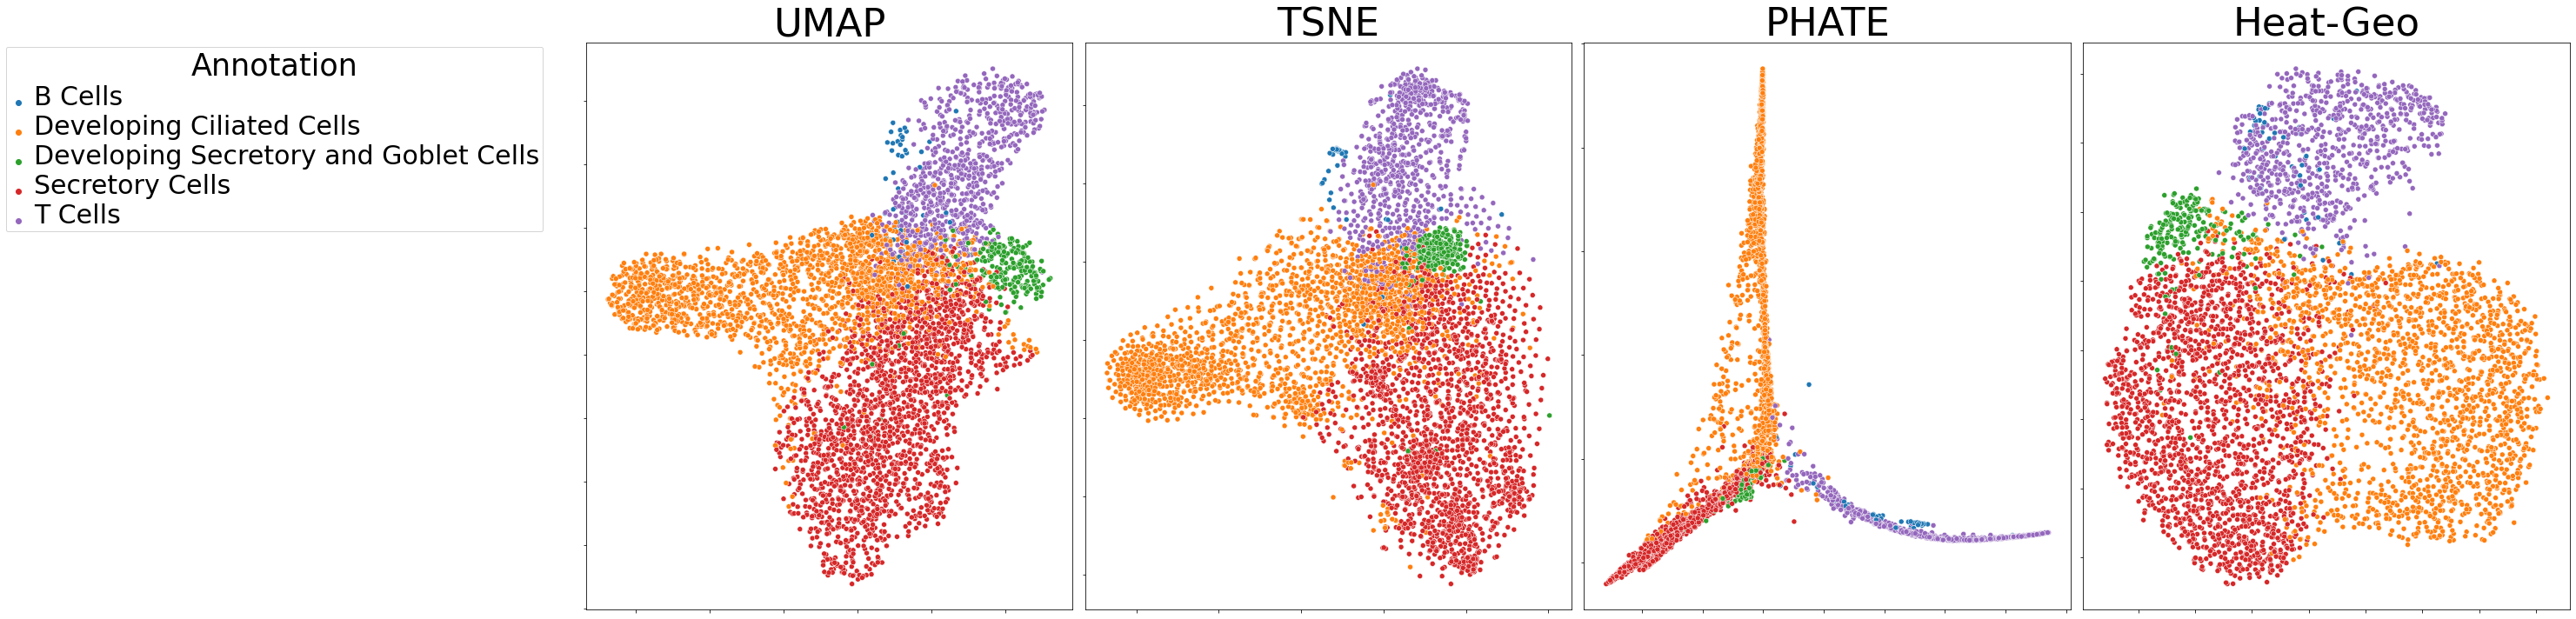

In [105]:
colors = pd.factorize(labels)[0] + 1
fig, axes = plt.subplots(1,4,figsize=(40,10))
sns.scatterplot(emb_umap[:,0],emb_umap[:,1], c=colors, hue=labels, legend=True, ax=axes[0]).set(title="UMAP", xticklabels=[],yticklabels=[])
sns.scatterplot(emb_tsne[:,0],emb_tsne[:,1], c=colors, hue=labels, legend=False, ax=axes[1]).set(title="TSNE",xticklabels=[],yticklabels=[])
sns.scatterplot(emb_phate[:,0],emb_phate[:,1], c=colors, hue=labels, legend=False, ax=axes[2]).set(title="PHATE",xticklabels=[],yticklabels=[])
sns.scatterplot(emb_mar[:,0],emb_mar[:,1], c=colors, hue=labels, legend=False, ax=axes[3]).set(title="Heat-Geo",xticklabels=[],yticklabels=[])
#sns.scatterplot(emb_multi[:,0],emb_multi[:,1], c=colors, hue=labels, legend=False, ax=axes[3]).set(title="Heat-Geo",xticklabels=[],yticklabels=[])
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(-1.2, 1))
plt.setp(axes[0].get_legend().get_texts(), fontsize='30') 
plt.setp(axes[0].get_legend().get_title(), fontsize='35')
for ax in axes:
    ax.title.set_size(45)
fig.tight_layout()
# fig.savefig("covid_nasal_v1.png", dpi=300, bbox_inches='tight')

In [16]:
for type in adata.obs.Annotation.unique():
    print(type)

Ciliated Cells
Basal Cells
Macrophages
Secretory Cells
Developing Secretory and Goblet Cells
Erythroblasts
Developing Ciliated Cells
Squamous Cells
Goblet Cells
Dendritic Cells
T Cells
Ionocytes
Mitotic Basal Cells
Deuterosomal Cells
Enteroendocrine Cells
B Cells
Mast Cells
Plasmacytoid DCs


In [52]:
mask = (adata.obs.Annotation.isin(["B Cells"])) & (adata.obs.Cohort_Disease_WHO_Score.isin(["Control_WHO_0"]))

In [53]:
adata[mask].obs.T

,TAGGCGGCGTGC_110_neg_array1,TCTTCCCTACCA_179_neg_array1,TTCATTGTTACT_376_neg_array1,GTTCGACGGCCC_376_neg_array1,TAGAGCAATCGA_376_neg_array1,CCGGTACGCTTA_376_neg_array1,AAGACTGAGTGG_376_neg_array2,TACACGTGGTTC_376_neg_array2,TAACCTGACCTG_376_neg_array2,CTCACATTTAGG_376_neg_array2,ATTCCGGTAACG_376_neg_array2,CTTACACTGCAA_593_neg_array1
donor_id,Control_Participant4,Control_Participant5,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant8
Peak_Respiratory_Support_WHO_Score,0,0,0,0,0,0,0,0,0,0,0,0
Bloody_Swab,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Percent_Mitochondrial,12.873134,0.872151,32.198221,5.737357,5.933202,8.815272,45.457262,32.851604,9.429825,11.393324,21.243808,23.076923
SARSCoV2_PCR_Status,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
SARSCoV2_PCR_Status_and_WHO_Score,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0
Cohort_Disease_WHO_Score,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0
biosample_id,WHO_0_Control_Participant4,WHO_0_Control_Participant5,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant8
SingleCell_SARSCoV2_RNA_Status,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
SARSCoV2_Unspliced_TRS_Total_Corrected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
mask = (adata.obs.Cohort_Disease_WHO_Score.isin(["Control_WHO_0"]))
adata_covid = adata[mask]

In [55]:
data = adata_covid.X
labels = adata_covid.obs["Annotation"]

In [56]:
knn=50
anisotropy=1
decay=40

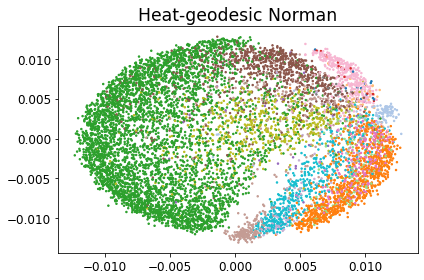

In [57]:
emb_op = EmbHeatGeo(knn=knn)
emb_op.scatterplot(data,labels,title="Heat-geodesic Covid/nasal",tau=0.005)

In [58]:
data.shape

(8689, 1000)

In [59]:
phate_op = phate.PHATE()
emb =  phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 8689 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 29.33 seconds.
    Calculating affinities...
    Calculated affinities in 3.24 seconds.
  Calculated graph and diffusion operator in 33.50 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.12 seconds.
    Calculating KMeans...
    Calculated KMeans in 13.03 seconds.
  Calculated landmark operator in 17.68 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 6.68 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.82 seconds.
Calculated PHATE in 66.05 seconds.


<AxesSubplot:>

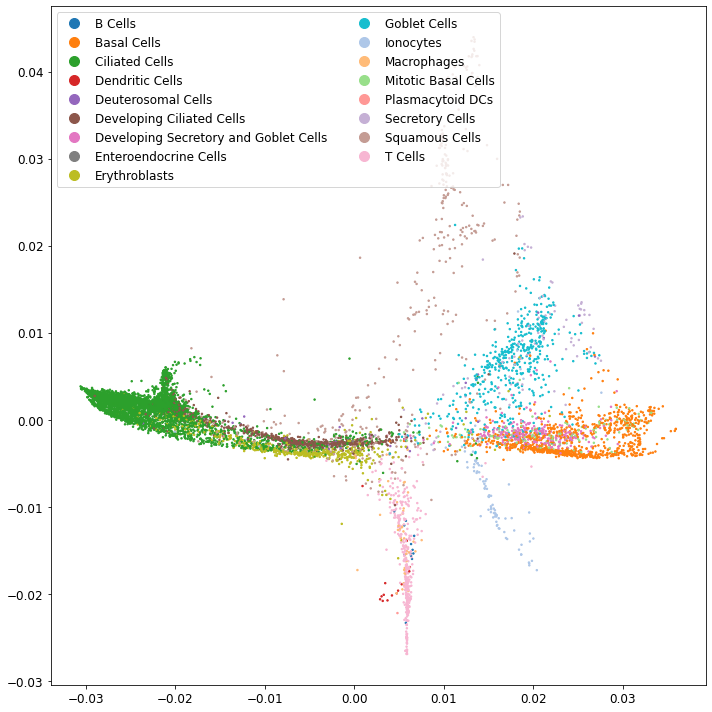

In [63]:
scprep.plot.scatter2d(emb,labels, figsize=(10,10))